In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(2400, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


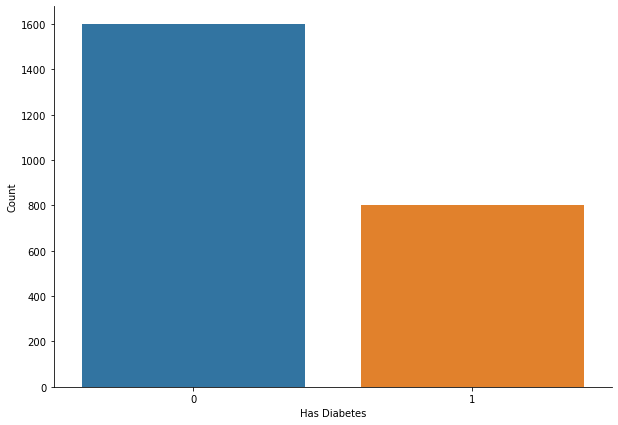

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

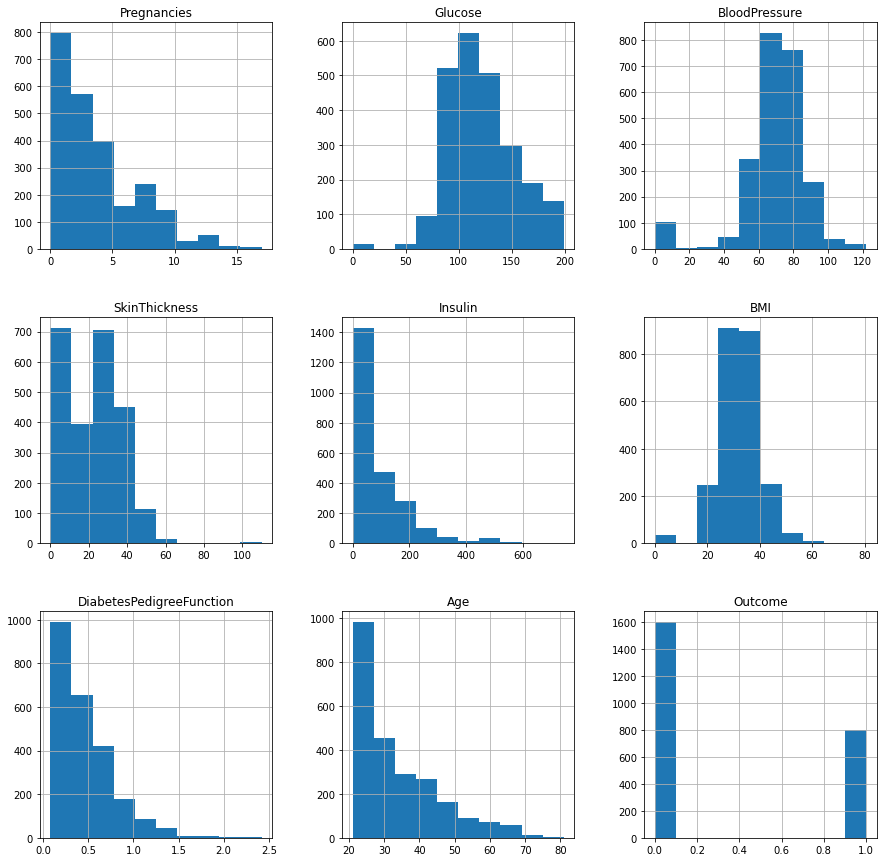

In [7]:
p = df.hist(figsize = (15,15))

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1920, 8), X_test size: (480, 8)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Density'>

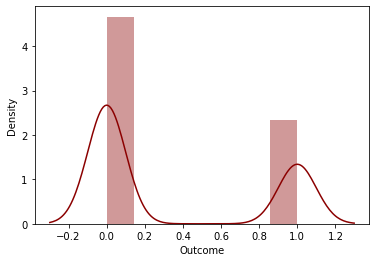

In [10]:
sns.distplot(df['Outcome'], color='darkred')

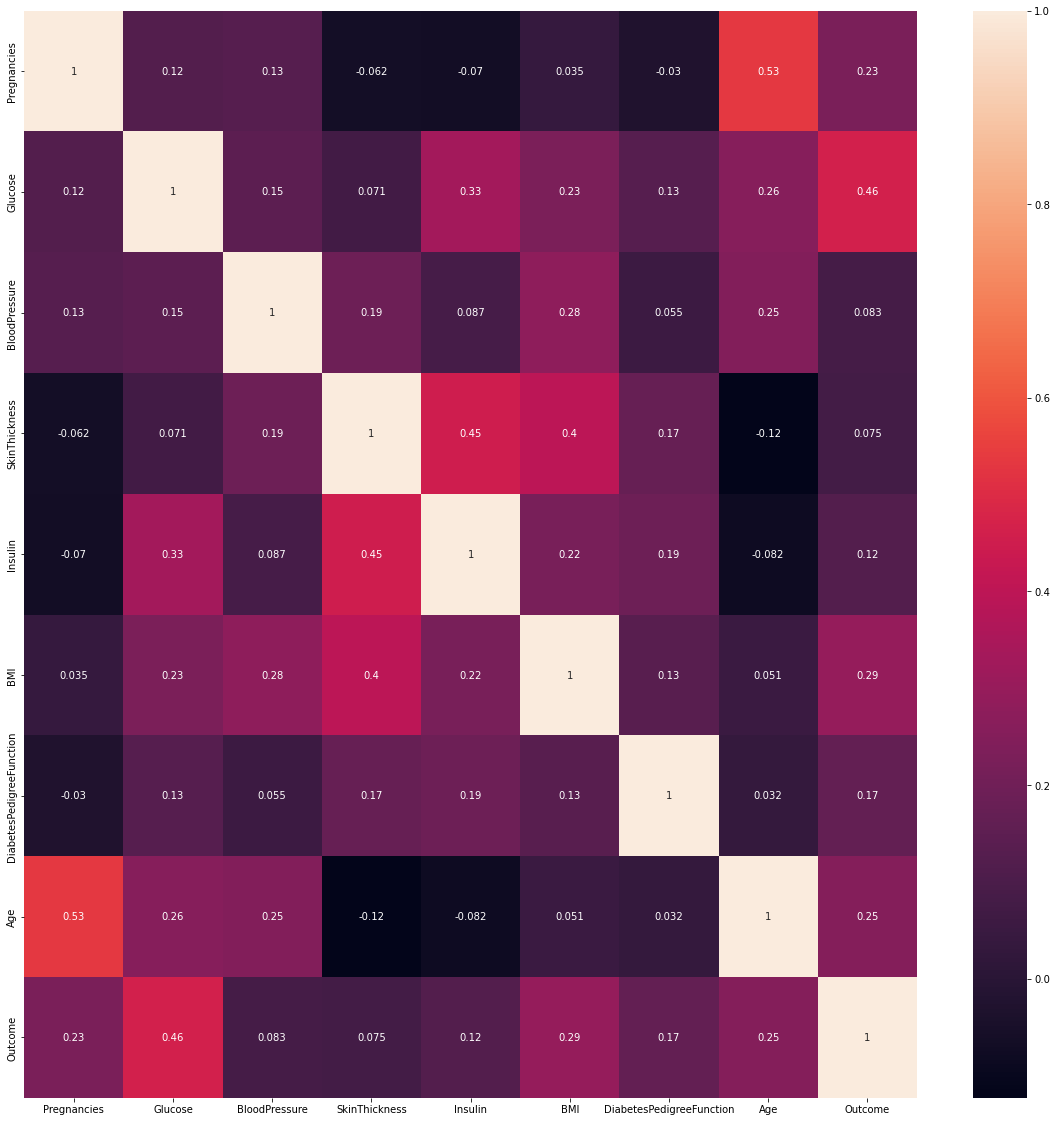

In [11]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[0.10640553 0.24747138 0.1031159  0.07681187 0.07293619 0.1394146
 0.10971359 0.14413093]
------------------------------------------------------------------------------
The accurcy of Extra Trees Classifier Model is :  99.16666666666667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       0.99      0.99      0.99       163

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



<AxesSubplot:>

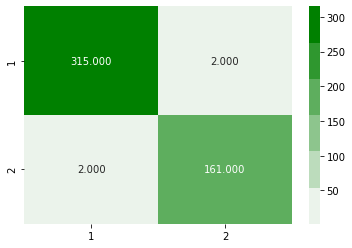

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import ExtraTreesClassifier
model_1 = ExtraTreesClassifier()
M1=model_1.fit(X_train,Y_train)
print(model_1.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
extra_trees_predict= model_1.predict(X_test)
print('------------------------------------------------------------------------------')
print('The accurcy of Extra Trees Classifier Model is : ', 100.0 * accuracy_score(extra_trees_predict,Y_test))
print(classification_report(extra_trees_predict,Y_test))
Z=confusion_matrix(Y_test, extra_trees_predict)
sns.heatmap(Z, annot=True, cmap=sns.light_palette("green"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])

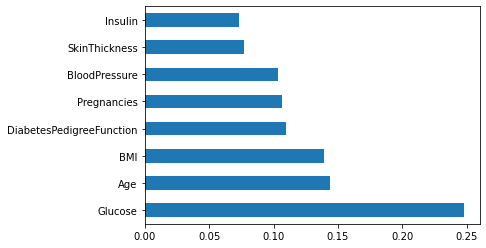

In [14]:
feat_importances = pd.Series(model_1.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

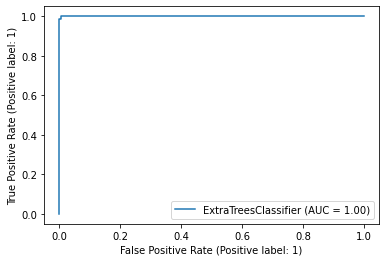

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(M1,X_test,Y_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
M2=model_2.fit(X_train,Y_train)
dtree_predict=model_2.predict(X_test)
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,Y_test))

The accuracy of Decision Tree Classifier is:  99.16666666666667


In [17]:
from sklearn.linear_model import LogisticRegression
model_3=LogisticRegression()
M3=model_3.fit(X_train, Y_train)
logreg_predict= model_3.predict(X_test)
print('The accurcy of Logistic Regression Model is : ', 100.0 * accuracy_score(logreg_predict,Y_test))

The accurcy of Logistic Regression Model is :  77.5


The accuracy of Random Forest Classifier is:  99.16666666666667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       0.99      0.99      0.99       163

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



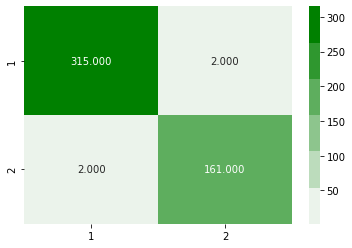

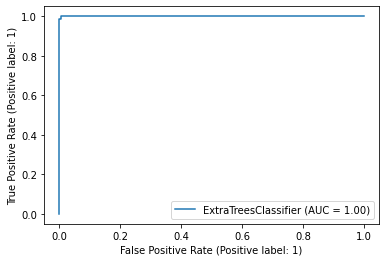

In [35]:
from sklearn.ensemble import RandomForestClassifier
model_4=RandomForestClassifier()
M4=model_4.fit(X_train,Y_train)
rfc_predict=model_4.predict(X_test)
print('The accuracy of Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,Y_test))
print(classification_report(extra_trees_predict,Y_test))
Z=confusion_matrix(Y_test, extra_trees_predict)
sns.heatmap(Z, annot=True, cmap=sns.light_palette("green"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(M1,X_test,Y_test)

In [19]:
from sklearn.svm import SVC
model_5=SVC()
M5=model_5.fit(X_train,Y_train)
svm_predict=model_5.predict(X_test)
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,Y_test))

The accuracy of SVM Classifier is:  84.79166666666667


In [20]:
from sklearn.ensemble import AdaBoostClassifier
model_6=AdaBoostClassifier(n_estimators=5,learning_rate=1)
M6=model_6.fit(X_train,Y_train)
adc_predict=model_6.predict(X_test)
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,Y_test))

The accuracy of Ada Boost Classifier is:  75.83333333333333


In [21]:
from xgboost import XGBClassifier
model_7=XGBClassifier()
M7=model_7.fit(X_train,Y_train)
xgb_predict=model_7.predict(X_test)
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,Y_test))

[10:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The accuracy of XGBoost Classifier is:  99.16666666666667


Text(0, 0.5, 'Error Rate')

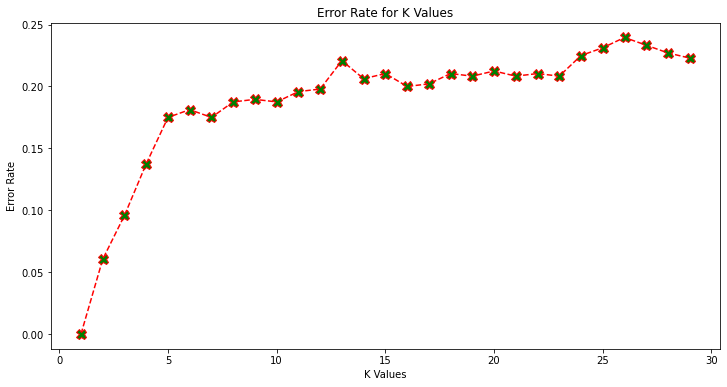

In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  M8=knn.fit(X_train, Y_train.values.ravel())
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != Y_test.values.ravel()))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed', marker='X', markerfacecolor='green', markersize=10)
plt.title('Error Rate for K Values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

In [23]:
knn1=KNeighborsClassifier(n_neighbors=1)
M9=knn1.fit(X_train,Y_train)
knn_predict=M9.predict(X_test)
print('The accuracy of KNN Model is: ', 100.0 * accuracy_score(knn_predict,Y_test))

The accuracy of KNN Model is:  100.0


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       0.99      0.99      0.99       163

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



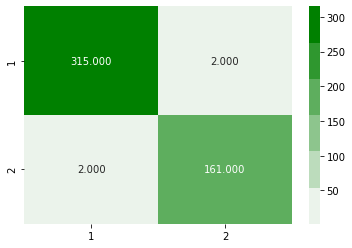

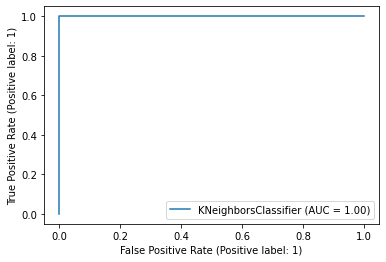

In [24]:
print(classification_report(extra_trees_predict,Y_test))
Z=confusion_matrix(Y_test, extra_trees_predict)
sns.heatmap(Z, annot=True, cmap=sns.light_palette("green"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(M9,X_test,Y_test)

In [25]:
print('Extra Trees Classifier Model is : ', 100.0 * accuracy_score(extra_trees_predict,Y_test))
print('Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,Y_test))
print('Logistic Regression Model is : ', 100.0 * accuracy_score(logreg_predict,Y_test))
print('Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,Y_test))
print('SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,Y_test))
print('Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,Y_test))
print('XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,Y_test))
print('KNN Model is: ', 100.0 * accuracy_score(knn_predict,Y_test))

q1='Extra Trees Classifier Model'
q2='Decision Tree Classifier'
q3='Logistic Regression Model'
q4='Random Forest Classifier'
q5='SVM Classifier'
q6='Ada Boost Classifier'
q7='XGBoost Classifier'
q8='KNN Model'


v1=100.0 * accuracy_score(extra_trees_predict,Y_test)
v2=100.0 * accuracy_score(dtree_predict,Y_test)
v3=100.0 * accuracy_score(logreg_predict,Y_test)
v4=100.0 * accuracy_score(rfc_predict,Y_test)
v5=100.0 * accuracy_score(svm_predict,Y_test)
v6=100.0 * accuracy_score(adc_predict,Y_test)
v7=100.0 * accuracy_score(xgb_predict,Y_test)
v8=100.0 * accuracy_score(knn_predict,Y_test)

Extra Trees Classifier Model is :  99.16666666666667
Decision Tree Classifier is:  99.16666666666667
Logistic Regression Model is :  77.5
Random Forest Classifier is:  99.16666666666667
SVM Classifier is:  84.79166666666667
Ada Boost Classifier is:  75.83333333333333
XGBoost Classifier is:  99.16666666666667
KNN Model is:  100.0


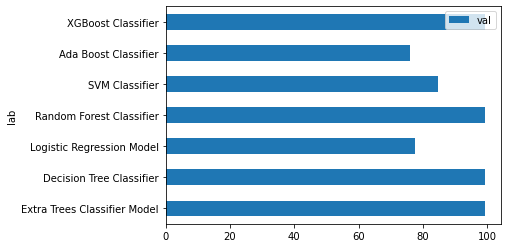

In [36]:

data = pd.DataFrame({'lab': [q1,q2,q3,q4,q5,q6,q7], 'val': [v1,v2,v3,v4,v5,v6,v7]})
ax = data.plot.barh(x='lab', y='val')

In [27]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return knn1.predict(x)

In [28]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [29]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(0, 81, 150, 15, 76, 90, 0.547, 52)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


In [33]:
import pickle
filename = 'diabetes-prediction-knn1-model.pkl'
pickle.dump(knn1, open(filename, 'wb'))

In [31]:
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(model_4, open(filename, 'wb'))

In [32]:
filename = 'diabetes-prediction-xgb-model.pkl'
pickle.dump(model_7, open(filename, 'wb'))
